In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import numpy as np 
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Activation, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [3]:
X_train_full=pd.read_csv('/kaggle/input/digit-recognizer/train.csv', header='infer').values
X_test=pd.read_csv('/kaggle/input/digit-recognizer/test.csv', header='infer').values


In [4]:
X_train=X_train_full[:,1:]
y_train=X_train_full[:,0]



In [5]:
X_train = (X_train.astype(np.float32))
X_test = (X_test.astype(np.float32))

In [6]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)


In [7]:
y_train_vectors=to_categorical(y_train)



In [8]:
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train_vectors, test_size=0.2, random_state=2)

In [9]:
#Define CNN
cnn=Sequential()

cnn.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False, input_shape=(X_train.shape[1:])))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=96, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))


cnn.add(Flatten())
    
cnn.add(Dense(units=10))
cnn.add(BatchNormalization())
cnn.add(Activation('softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2022-03-02 04:52:48.921700: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-02 04:52:49.051414: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-02 04:52:49.052566: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-02 04:52:49.054345: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [10]:
train_datagen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             zca_whitening=False,
                             rotation_range=10,
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=False,
                             vertical_flip=False
                            )


In [11]:
train_generator = train_datagen.flow(X_train, y_train,
                                     batch_size=120,
                                     shuffle=True)

val_datagen = ImageDataGenerator()
val_generator = val_datagen.flow(X_val, y_val,
                                 batch_size=120,
                                 shuffle=True)

In [12]:
reduceLROnPlateau = ReduceLROnPlateau(monitor='val_acc', 
                                patience=3,
                                verbose=1, 
                                factor=0.1,
                                min_lr=0.00001)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        288       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18432     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0

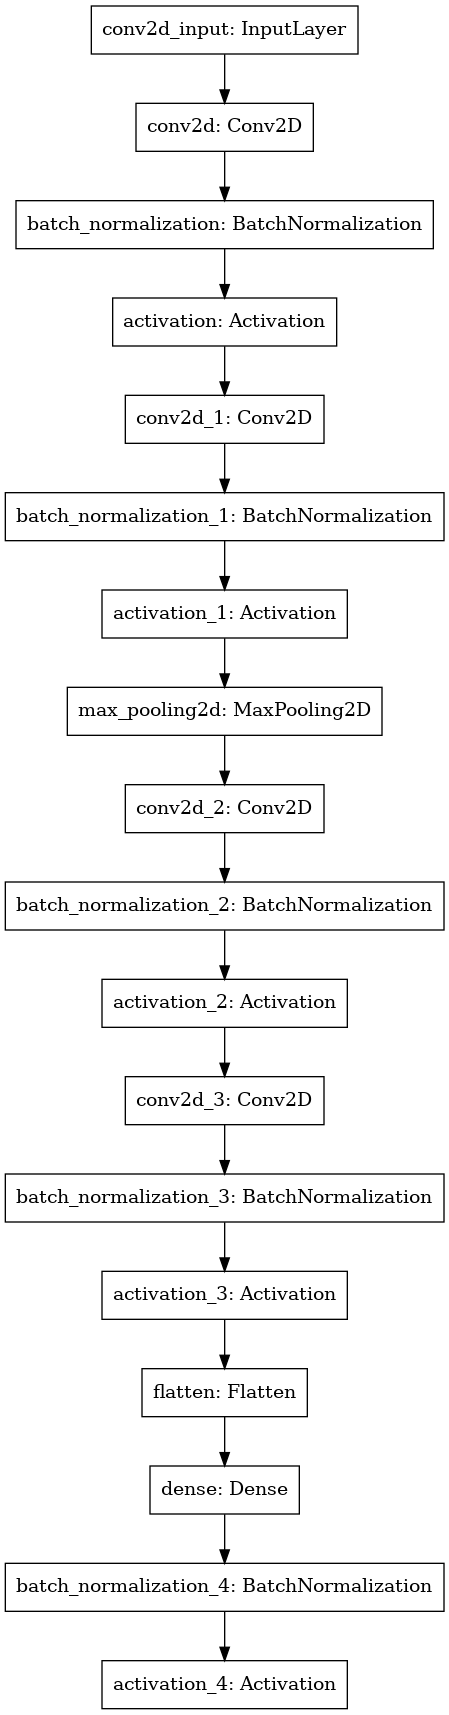

In [13]:
cnn.summary()

tf.keras.utils.plot_model(cnn)

In [14]:
cnn.fit(train_generator, epochs=80, callbacks=[reduceLROnPlateau], validation_data=val_generator)


2022-03-02 04:52:53.906869: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/80


2022-03-02 04:52:55.923896: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


280/280 [==============================] - 22s 50ms/step - loss: 0.5370 - accuracy: 0.9293 - val_loss: 0.3148 - val_accuracy: 0.9660
Epoch 2/80
280/280 [==============================] - 14s 49ms/step - loss: 0.2643 - accuracy: 0.9802 - val_loss: 0.1650 - val_accuracy: 0.9885
Epoch 3/80
280/280 [==============================] - 14s 50ms/step - loss: 0.1812 - accuracy: 0.9850 - val_loss: 0.1229 - val_accuracy: 0.9899
Epoch 4/80
280/280 [==============================] - 14s 50ms/step - loss: 0.1383 - accuracy: 0.9867 - val_loss: 0.1113 - val_accuracy: 0.9833
Epoch 5/80
280/280 [==============================] - 13s 47ms/step - loss: 0.1104 - accuracy: 0.9876 - val_loss: 0.0904 - val_accuracy: 0.9896
Epoch 6/80
280/280 [==============================] - 14s 51ms/step - loss: 0.0903 - accuracy: 0.9897 - val_loss: 0.1012 - val_accuracy: 0.9900
Epoch 7/80
280/280 [==============================] - 13s 47ms/step - loss: 0.0781 - accuracy: 0.9901 - val_loss: 0.0720 - val_accuracy: 0.9906
Epo

In [15]:

prediction_vectors=cnn.predict(X_test)

In [16]:
predictions_final=np.argmax(prediction_vectors, axis=1)


In [17]:
#Read sample_submission.csv in dataframe sub
sub = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

#Overwrite labels in dataframe sub
sub["Label"] = predictions_final

#Write updated dataframes as submission.csv
sub.to_csv('submission.csv',index=False)